In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
with open('data/14.txt', 'r') as f:
    data = f.read().splitlines()

In [2]:
DATA_SHAPE = (101, 103)

In [3]:
class Robot:
    def __init__(self, pos, vel):
        self.start_pos = pos
        self.pos = pos
        self.vel = vel

    def __repr__(self):
        return f'Position: {self.pos}\nVelocity: {self.vel}'
    
    def new_pos(self, seconds):
        pos = (
            (self.pos[0] + self.vel[0] * seconds) % DATA_SHAPE[0], 
            (self.pos[1] + self.vel[1] * seconds) % DATA_SHAPE[1]
        )
        zone = self._get_zone(pos)
        self.pos = pos
        return pos, zone
    
    def reset_pos(self):
        self.pos = self.start_pos
    
    @staticmethod
    def _get_zone(pos):
        if pos[0] < (DATA_SHAPE[0] - 1) // 2 and pos[1] < (DATA_SHAPE[1] - 1) // 2:
            return 0
        elif pos[0] > (DATA_SHAPE[0]) // 2 and pos[1] < (DATA_SHAPE[1] - 1) // 2:
            return 1
        elif pos[0] < (DATA_SHAPE[0] - 1) // 2 and pos[1] > (DATA_SHAPE[1] - 1) // 2:
            return 2
        elif pos[0] > (DATA_SHAPE[0] - 1) // 2 and pos[1] > (DATA_SHAPE[1] - 1) // 2:
            return 3
        return

In [4]:
def print_all(robots):
    room = np.zeros(DATA_SHAPE[::-1], dtype=int)
    for r in robots:
        room[r.pos[::-1]] = 1
    plt.imshow(room)

In [5]:
robots = []
for line in data:
    pos_x = int(line.split(',')[0].split('=')[1])
    pos_y = int(line.split(',')[1].split()[0])
    vel_x = int(line.split(',')[1].split('=')[1])
    vel_y = int(line.split(',')[2])
    robots.append(Robot((pos_x, pos_y), (vel_x, vel_y)))

In [6]:
zones = defaultdict(int)
for r in robots:
    pos, zone = r.new_pos(100)
    if zone is not None:
        zones[zone] += 1

res = 1
for z in zones.values():
    res *= z
print(res)

231852216


In [7]:
for robot in robots:
    robot.reset_pos()

In [8]:
i = 0
while True:
    i+=1
    poses = set()
    for r in robots:
        pos, _ = r.new_pos(1)
        poses.add(tuple(pos))
    if len(poses) == len(robots):
        break

In [9]:
i

8159

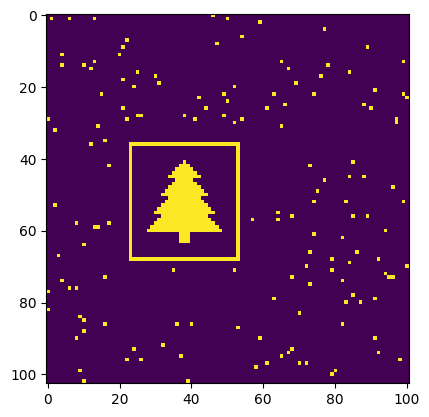

In [10]:
print_all(robots)